In [1]:
import numpy as np
import os
from typing import Tuple
import tensorflow as tf
from sklearn.utils import class_weight

In [129]:
from constants import *

# LSTM Classification

In [175]:
x_training = np.load(os.path.join(TRAINING_PATH, "class", "features.npy"), allow_pickle=True)
x_training = np.array([x_training[i].T for i in range(x_training.shape[0])])[-800:]
y_training = np.load(os.path.join(TRAINING_PATH, "class", "labels.npy"), allow_pickle=True)[-800:]
y_training = np.array([-1 if y<0 else 0 if y==0 else 1 for y in y_training-2])+1
print(y_training)

# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_training), y=y_training)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

INPUT_DIM = x_training.shape[1:]

# x_training = tf.convert_to_tensor(x_training.astype('float32'))
# y_training = tf.convert_to_tensor(y_training.astype('int32'))

# x_training = x_training.astype('float32')
# y_training = y_training.astype('int32')
# y_training = tf.one_hot(y_training, 5)



[0 0 2 2 0 1 2 1 2 0 0 0 1 1 0 1 2 0 1 1 2 0 0 1 1 0 0 2 0 1 0 1 1 2 1 1 0
 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 2 1 2 0 0 1 2 1 1 2 1 1 1
 2 0 2 1 1 1 1 0 2 1 1 0 1 1 2 1 0 2 2 2 1 1 0 2 1 0 2 1 2 2 1 2 0 2 0 2 1
 1 1 1 1 1 1 0 2 1 0 1 2 1 1 1 1 1 2 1 0 1 1 0 2 1 1 2 0 1 2 1 2 1 2 0 1 1
 2 0 1 1 0 1 2 2 0 2 2 2 2 2 2 2 0 1 2 2 2 0 2 1 2 1 0 2 0 1 0 2 2 2 1 1 1
 0 0 2 0 1 1 2 0 1 1 2 1 2 1 2 0 0 1 0 2 1 0 2 2 1 2 0 2 0 1 2 1 1 0 0 1 0
 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 1 1 2 1 1 1 0 1 2 1 0 2 2 1 1 1 0 2 0 1 1
 1 2 0 2 2 2 2 0 2 0 1 2 1 2 0 0 2 2 1 1 2 2 1 2 1 0 0 1 2 2 2 0 1 2 0 2 1
 1 0 2 0 0 2 2 1 1 2 1 1 1 0 0 2 0 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 1 2 1 0 0
 2 2 0 2 1 1 2 1 0 2 1 2 0 1 0 2 1 1 0 2 2 2 0 2 1 1 2 1 1 1 1 1 1 1 1 2 2
 1 1 1 0 0 1 0 1 1 1 2 0 2 1 1 2 2 2 1 0 1 0 2 0 0 1 1 0 1 1 1 0 1 0 1 2 1
 1 2 1 2 2 2 0 2 1 1 0 2 1 2 1 1 2 2 2 0 0 0 0 2 1 1 1 0 2 2 2 2 1 1 2 1 2
 0 2 1 1 2 1 1 2 0 1 2 0 1 0 1 0 2 0 0 0 2 1 2 0 0 0 1 2 1 1 2 0 1 1 1 1 1
 0 0 1 2 1 1 0 1 0 1 1 0 

In [176]:
x_test = np.load(os.path.join(TEST_PATH, "class", "features.npy"), allow_pickle=True)
x_test = np.array([x_test[i].T for i in range(x_test.shape[0])])
y_test = np.load(os.path.join(TEST_PATH, "class", "labels.npy"), allow_pickle=True)
y_test = np.array([-1 if y<0 else 0 if y==0 else 1 for y in y_test-2])+1

INPUT_DIM = x_test.shape[1:]

# x_test = tf.convert_to_tensor(x_test.astype('float32'))
# y_test = tf.convert_to_tensor(y_test.astype('int32'))
# y_test = tf.one_hot(y_test, 5)

In [177]:
x_full = np.concatenate((x_training, x_test))
y_full = np.concatenate((y_training, y_test))
x_train_n_inst = int(np.ceil(x_full.shape[0]*0.8))

x_training = x_full[:x_train_n_inst]
y_training = y_full[:x_train_n_inst]

x_test = x_full[x_train_n_inst:]
y_test = y_full[x_train_n_inst:]

INPUT_DIM = x_training.shape[1:]

x_training = tf.convert_to_tensor(x_training.astype('float32'))
y_training = tf.convert_to_tensor(y_training.astype('int32'))

x_test = tf.convert_to_tensor(x_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('int32'))

In [143]:
# class_weights_np = np.array(class_weights)
# class_weights_np[0] = 2.2
# class_weights = tf.convert_to_tensor(class_weights_np.astype('float32'))
# class_weights

In [144]:
print(f"Number of instances belonging to each class: {np.unique(y_training, return_counts=True)[1]}")
print(f"Class weights: {class_weights}")
print(f"Weighted number of instances belonging to each class: {np.unique(y_training, return_counts=True)[1]*class_weights}")

Number of instances belonging to each class: [240 416 300]
Class weights: [1.38888889 0.75542965 1.04575163]
Weighted number of instances belonging to each class: [333.33333333 314.25873466 313.7254902 ]


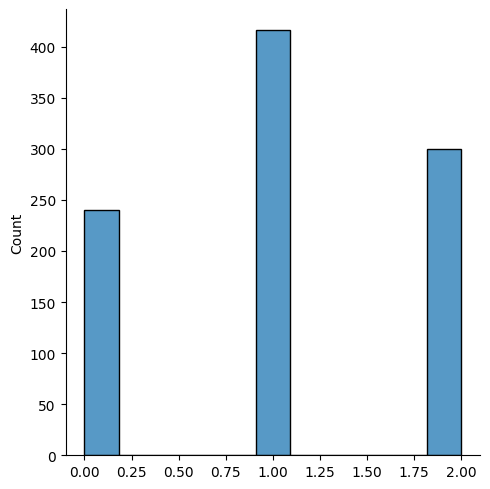

In [145]:
import seaborn as sns
sns.displot(y_training)

In [146]:
class_weights = tf.cast(tf.constant(class_weights), "float32")

In [147]:
def weightedLoss(weights=tf.constant([1,1,1])):
    def innerLoss(true, pred):
        w = tf.gather(weights, true) #(batch, labels, 1)

        loss = tf.keras.backend.sparse_categorical_crossentropy(true, pred) #(batch, labels)
        loss = w * loss

        return loss

    return innerLoss

In [148]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler_plt = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
lr_scheduler_exp = tf.keras.optimizers.schedules.ExponentialDecay(0.001, 10, 0.9, staircase=True)

In [162]:
def create_lstm_model(input_shape:Tuple[int, int]) -> tf.keras.Model:
    
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.LSTM(32, activation="tanh", return_sequences=True),
        tf.keras.layers.LSTM(256, activation="tanh", return_sequences=False),
        # tf.keras.layers.LSTM(512, activation="tanh", return_sequences=False),
        # tf.keras.layers.LSTM(128, activation="tanh"),
        # tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
    ])

    model.compile(
        loss=weightedLoss(class_weights),
        # loss="sparse_categorical_crossentropy",
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
        # optimizer = tf.keras.optimizers.legacy.Adagrad(epsilon=1e-4),
        metrics=["acc"]
    )

    return model

In [163]:
model = create_lstm_model(INPUT_DIM)

In [164]:

history = model.fit(x_training, 
                    y_training, 
                    validation_split=VALIDATION_SPLIT,
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_batch_size=BATCH_SIZE,
                    callbacks=[lr_scheduler_plt]
                    )

Epoch 1/50
54/54 [==============================] - 5s 50ms/step - loss: 1.0979 - acc: 0.4146 - val_loss: 1.0865 - val_acc: 0.4404 - lr: 0.0010
Epoch 2/50
54/54 [==============================] - 1s 15ms/step - loss: 1.0783 - acc: 0.4270 - val_loss: 1.0767 - val_acc: 0.4128 - lr: 0.0010
Epoch 3/50
54/54 [==============================] - 1s 15ms/step - loss: 1.0490 - acc: 0.4599 - val_loss: 1.0583 - val_acc: 0.4587 - lr: 0.0010
Epoch 4/50
54/54 [==============================] - 1s 15ms/step - loss: 1.0109 - acc: 0.4650 - val_loss: 1.0204 - val_acc: 0.4587 - lr: 0.0010
Epoch 5/50
54/54 [==============================] - 1s 15ms/step - loss: 0.9759 - acc: 0.5123 - val_loss: 0.9939 - val_acc: 0.4404 - lr: 0.0010
Epoch 6/50
54/54 [==============================] - 1s 14ms/step - loss: 0.9309 - acc: 0.5422 - val_loss: 0.9576 - val_acc: 0.4954 - lr: 0.0010
Epoch 7/50
54/54 [==============================] - 1s 15ms/step - loss: 0.9080 - acc: 0.5576 - val_loss: 0.9536 - val_acc: 0.4954 - lr:

In [165]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 27, 32)            8832      
                                                                 
 lstm_33 (LSTM)              (None, 256)               295936    
                                                                 
 dense_34 (Dense)            (None, 64)                16448     
                                                                 
 dense_35 (Dense)            (None, 3)                 195       
                                                                 
Total params: 321,411
Trainable params: 321,411
Non-trainable params: 0
_________________________________________________________________


In [166]:
accuracy = history.history["acc"]
val_accuracy = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

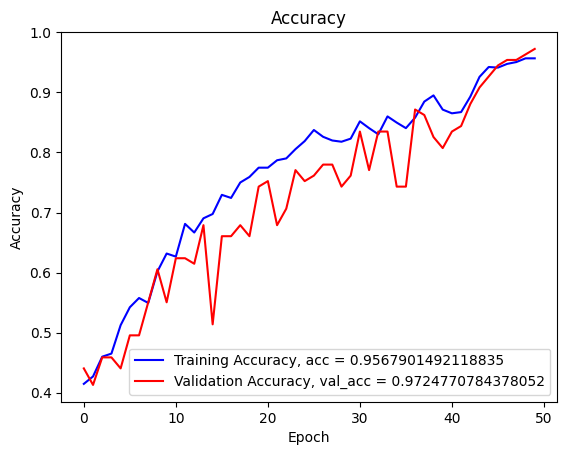

In [167]:
import matplotlib.pyplot as plt
plt.plot(range(len(accuracy)), accuracy, "b", label = f"Training Accuracy, acc = {accuracy[-1]}")
plt.plot(range(len(accuracy)), val_accuracy, "-r", label = f"Validation Accuracy, val_acc = {val_accuracy[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

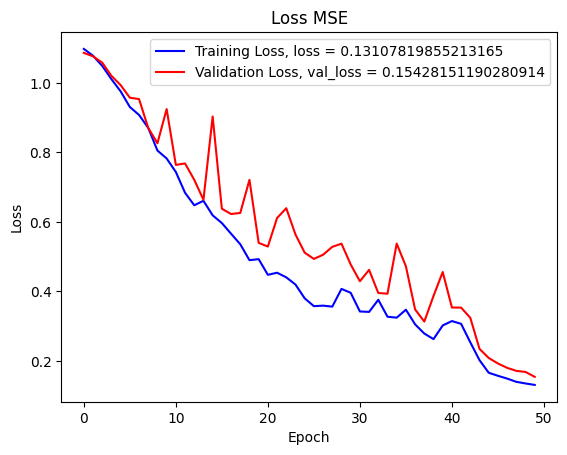

In [168]:
plt.plot(range(EPOCHS), loss, "b", label = f"Training Loss, loss = {loss[-1]}")
plt.plot(range(EPOCHS), val_loss, "-r", label = f"Validation Loss, val_loss = {val_loss[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss MSE")
plt.show()

In [178]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 56ms/step - loss: 3.6789 - acc: 0.3975


[3.678851842880249, 0.3974895477294922]

In [179]:
from sklearn.metrics import classification_report, confusion_matrix
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = classification_report(y_test, y_prediction)
print(result)

8/8 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.25      0.35      0.29        52
           1       0.55      0.43      0.48       126
           2       0.33      0.38      0.35        61

    accuracy                           0.40       239
   macro avg       0.38      0.38      0.38       239
weighted avg       0.43      0.40      0.41       239



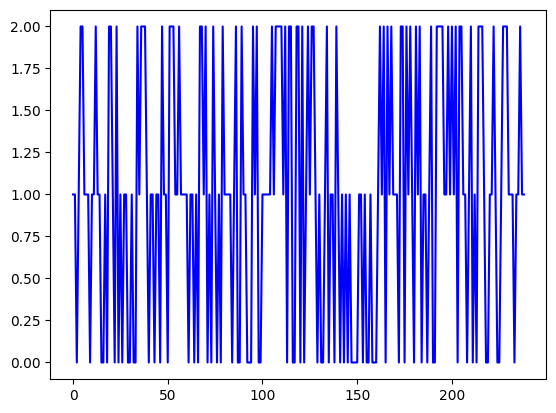

In [180]:
plt.plot(range(len(y_prediction)), y_prediction[:], "-b", label = f"Predicted")

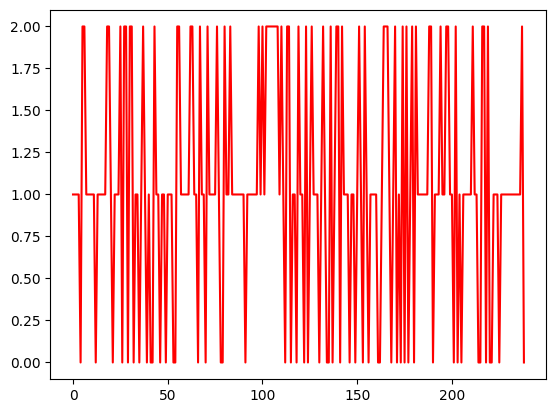

In [181]:
plt.plot(range(len(y_prediction)), y_test[:], "-r", label = f"Actual")

In [182]:
right_idx = np.where(y_prediction == y_test)[0]
idxs = range(len(y_prediction))
not_right_idx = [i for i in idxs if i not in right_idx]
right = np.zeros_like(y_prediction)
right[right_idx] = y_prediction[right_idx]
right[not_right_idx] = 3

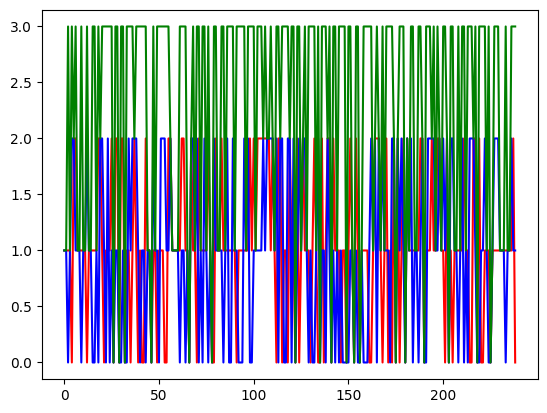

In [183]:
plt.plot(range(len(y_prediction)), y_test[:], "r", label = f"Actual")
plt.plot(range(len(y_prediction)), y_prediction[:], "b", label = f"Predicted")
plt.plot(range(len(y_prediction)), right[:], "g", label = f"Right")
plt.show()

In [185]:
y_pred_0 = np.where(y_prediction == 0)[0]
y_pred_1 = np.where(y_prediction == 1)[0]
y_pred_2 = np.where(y_prediction == 2)[0]

y_test_0 = np.where(y_test == 0)[0]
y_test_1 = np.where(y_test == 1)[0]
y_test_2 = np.where(y_test == 2)[0]

y_0_right = np.intersect1d(y_pred_0, y_test_0)
y_1_right = np.intersect1d(y_pred_1, y_test_1)
y_2_right = np.intersect1d(y_pred_2, y_test_2)

print(f"Class 0 accuracy: {len(y_0_right)/len(y_test_0)}")
print(f"Class 1 accuracy: {len(y_1_right)/len(y_test_1)}")
print(f"Class 2 accuracy: {len(y_2_right)/len(y_test_2)}")

Class 0 accuracy: 0.34615384615384615
Class 1 accuracy: 0.42857142857142855
Class 2 accuracy: 0.3770491803278688


In [184]:
print(pos:=np.where(np.abs(y_prediction-y_test) == 1)[0].shape[0]+np.where(y_prediction == y_test)[0].shape[0])
print(np.where(y_prediction != y_test)[0].shape[0] - np.where(np.abs(y_prediction-y_test) == 1)[0].shape[0])
print(np.where(np.abs(y_prediction-y_test) > 2)[0].shape[0])
print(np.where(np.abs(y_prediction-y_test) > 3)[0].shape[0])
print(all:=y_prediction.shape[0])

212
27
0
0
239


In [245]:
np.where(y_test == 0)[0]

array([  1,   4,   5,   8,  10,  11,  12,  13,  14,  16,  17,  21,  23,
        25,  28,  31,  32,  36,  37,  39,  43,  46,  47,  48,  49,  52,
        54,  58,  62,  64,  65,  76,  77,  78,  91,  98, 106, 116, 123,
       125, 134, 140, 141, 143, 144, 146, 148, 149, 160, 168, 177, 182,
       185, 188, 191, 195, 197, 198, 202, 205, 209, 210, 222, 226, 234,
       235, 247, 268, 271, 274, 278, 280, 286, 290, 291, 293, 297, 302,
       305, 309, 312, 317, 318, 324, 327, 329, 331, 333, 336, 346, 357,
       359, 361, 370, 371, 374, 376, 377, 381, 394])

In [246]:
pos/all

0.8455696202531645

In [77]:
def foo(y_test, y_prediction):
    y_test = y_test-2
    y_test = np.array([-1 if i<0 else 0 if i==0 else 1 for i in y_test])
    y_prediction = y_prediction-2
    y_prediction = np.array([-1 if i<0 else 0 if i==0 else 1 for i in y_prediction])

    return np.where(y_test == y_prediction)[0].shape[0]/y_test.shape[0]

In [78]:
foo(y_test, y_prediction)

0.7240506329113924

In [215]:
import datetime

model.save(os.path.join(MODEL_LSTM_CLASS_OUTPUT_DIR, f"{datetime.datetime.now().strftime('%Y-%m-%d-%H')}.h5"))

# LSTM Regression

In [98]:
NUMBER_OF_TRAINING_DATA = 10
EPOCHS = 50

TRAINING_PATH = "../data_collection/datasets/training"
TEST_PATH = "../data_collection/datasets/test"

x_training = np.load(os.path.join(TRAINING_PATH, "reg", "features.npy"), allow_pickle=True)
x_training = np.array([x_training[i].T for i in range(x_training.shape[0])])[-900:]
y_training = np.load(os.path.join(TRAINING_PATH, "reg", "labels.npy"), allow_pickle=True)[-900:]


INPUT_DIM = x_training.shape[1:]

x_training = tf.convert_to_tensor(x_training.astype('float32'))
y_training = tf.convert_to_tensor(y_training.astype('float32'))

# x_training = x_training.astype('float32')
# y_training = y_training.astype('int32')
# y_training = tf.one_hot(y_training, 5)



FileNotFoundError: [Errno 2] No such file or directory: '../data_collection/datasets/training/reg/features.npy'

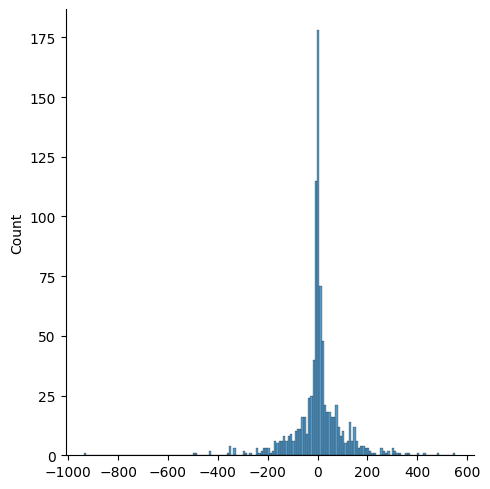

In [627]:
import seaborn as sns

sns.displot(y_training)

In [24]:
def create_lstm_regression_model(input_shape:Tuple[int, int]) -> tf.keras.Model:
    """Creates a regression model with LSTM layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        tf.keras.layers.LSTM(64, activation="tanh", dropout=0.1, return_sequences=True),
        tf.keras.layers.LSTM(86, activation="tanh", return_sequences=True),
        tf.keras.layers.LSTM(128, activation="tanh"),
        # tf.keras.layers.Dense(128, activation="relu"),
        # tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])

    model.compile(
        # loss=weightedLoss(class_weights),
        loss=tf.keras.losses.MeanSquaredLogarithmicError(),
        optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.005, epsilon=3e-03),
        metrics=["mae"]
    )

    return model

In [25]:
model = create_lstm_regression_model(INPUT_DIM)

In [26]:
history = model.fit(x_training, y_training, validation_split=VALIDATION_SPLIT, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
13/13 [==============================] - 3s 86ms/step - loss: 4.6573 - mae: 57.5814 - val_loss: 4.5890 - val_mae: 79.9487
Epoch 2/50
13/13 [==============================] - 0s 25ms/step - loss: 3.6192 - mae: 57.9958 - val_loss: 4.6174 - val_mae: 79.9592
Epoch 3/50
13/13 [==============================] - 0s 22ms/step - loss: 3.5529 - mae: 57.7815 - val_loss: 4.7853 - val_mae: 80.0045
Epoch 4/50
13/13 [==============================] - 0s 23ms/step - loss: 3.5812 - mae: 57.6759 - val_loss: 4.7585 - val_mae: 80.0001
Epoch 5/50
13/13 [==============================] - 0s 23ms/step - loss: 3.5509 - mae: 57.7370 - val_loss: 4.7354 - val_mae: 79.9982
Epoch 6/50
13/13 [==============================] - 0s 22ms/step - loss: 3.5420 - mae: 57.7283 - val_loss: 4.7485 - val_mae: 80.0071
Epoch 7/50
13/13 [==============================] - 0s 21ms/step - loss: 3.5301 - mae: 57.7166 - val_loss: 4.7772 - val_mae: 80.0177
Epoch 8/50
13/13 [==============================] - 0s 22ms/step - lo

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 23, 64)            25856     
                                                                 
 lstm_7 (LSTM)               (None, 23, 86)            51944     
                                                                 
 lstm_8 (LSTM)               (None, 128)               110080    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 188,009
Trainable params: 188,009
Non-trainable params: 0
_________________________________________________________________


In [28]:
accuracy = history.history["mae"]
val_accuracy = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

KeyError: 'val_acc'

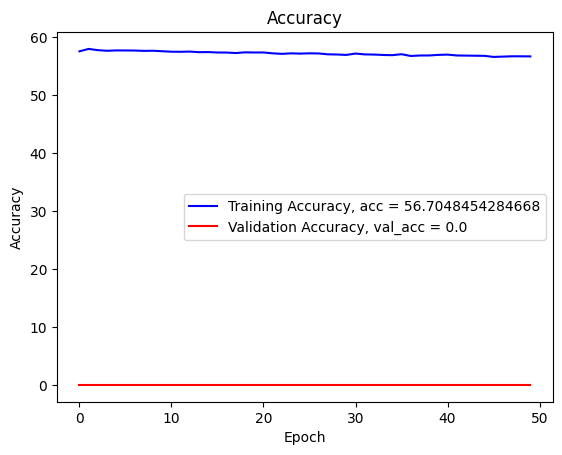

In [29]:
import matplotlib.pyplot as plt
plt.plot(range(len(accuracy)), accuracy, "b", label = f"Training Accuracy, acc = {accuracy[-1]}")
plt.plot(range(len(accuracy)), val_accuracy, "-r", label = f"Validation Accuracy, val_acc = {val_accuracy[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

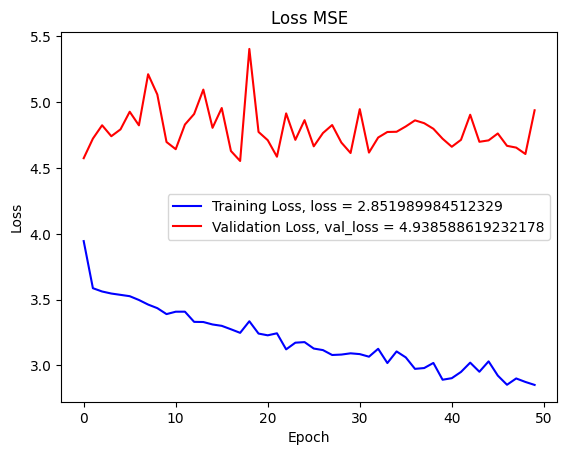

In [30]:
plt.plot(range(EPOCHS), loss, "b", label = f"Training Loss, loss = {loss[-1]}")
plt.plot(range(EPOCHS), val_loss, "-r", label = f"Validation Loss, val_loss = {val_loss[-1]}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss MSE")
plt.show()

In [31]:
x_test = np.load(os.path.join(TEST_PATH, "reg", "features.npy"), allow_pickle=True)
x_test = np.array([x_test[i].T for i in range(x_test.shape[0])])
y_test = np.load(os.path.join(TEST_PATH, "reg", "labels.npy"), allow_pickle=True)

INPUT_DIM = x_test.shape[1:]

x_test = tf.convert_to_tensor(x_test.astype('float32'))
y_test = tf.convert_to_tensor(y_test.astype('float32'))
# y_test = tf.one_hot(y_test, 5)

In [32]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 12ms/step - loss: 3.9227 - mae: 47.5587


[3.922714948654175, 47.5587043762207]